### Background
Bank can end the relationship with a customer at any time, just as a customers can move to another bank at any time. A customers could move because of some reason likes a competitor offers a better deal or because of unsatisfactory with the bank.

### Problem
When the customers a bank decided to end the relationship with the bank (or exit account), its could arise some problems for the bank. Bank would lose their customers and having hard time to gain their trust. That was when the bank would has experience loss.

### Goals
In order to know the pattern of customers who will exit their account, this research aims to:
1. Perform **Exploratory Data Analyst** to know the characteristic of customers that exit account
2. Building **Machine Learning** to predict whether a customer will exit account or no

### Results
#### `Exploratory Data Analyst`
- Range age that has highest percentage of exit account from bank is **Lansia Awal (50.57) followed by Lansia Akhir (48.32)**
- Customers who has high balance tend to exit account with percentage around 24.98%
- Germany has the highest percentage of exit account with percentage around 32.44%
- female has higher percentage of Exit Acount around 25.07%
- Customers that is not active member tend to exit account with percentage aroung 26.85%

#### `Machine Learning`
In Building Machine Learning, I used 3 algoritms (Logistic regression, Random forest, Decision Tree). 
- Best Base Model after handling imbalance data using Random Over Sampling is Logistic regression with Recall 0.70
- While after did a Tuning on Decision tree and Random Forest, Tuning random forest has higher recall rather than Decision Tree

### Suggestion
Since I didn't do scaling for Balance and EstimatedSalary features because I used algorithms that base on tree, its would be better to try another algorithms that use distance base likes KNN, SVC etc and did scaling in both of that features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [38]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\PRACTICES\TEST\bank.csv',index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
## Checking for missing value
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        #numeric columns
        numeric_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (10)
['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
----------------------------------------------------------------------------------------------------
Categorical Columns (3)
['Surname', 'Geography', 'Gender']


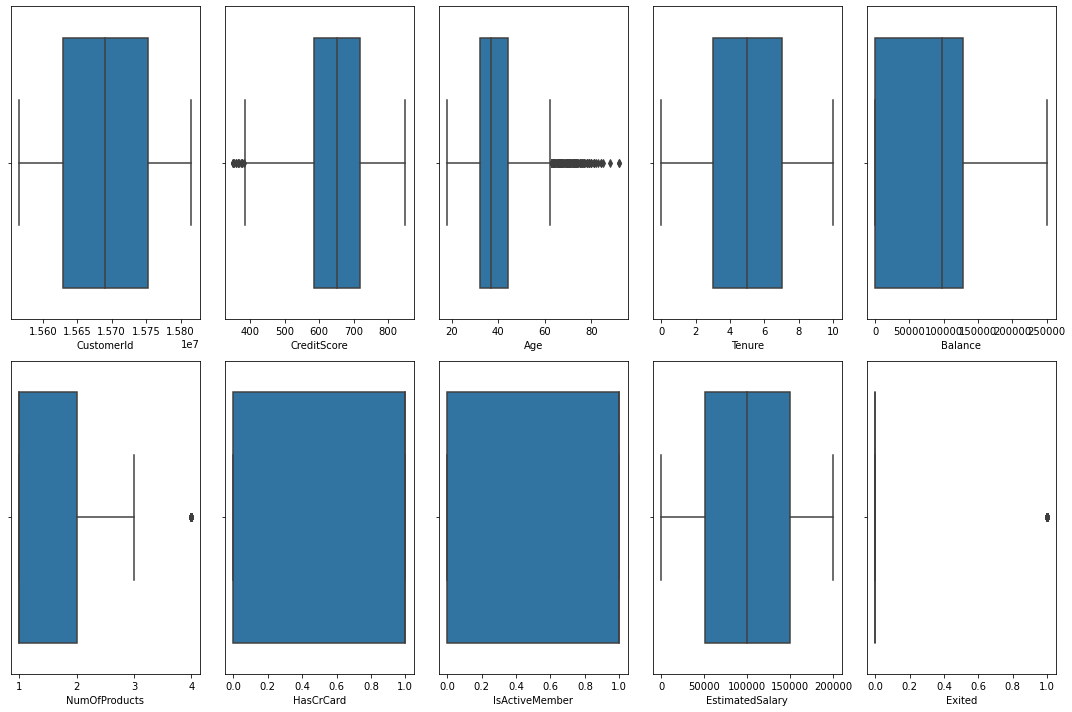

In [6]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_col):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [9]:
bankDESC = []

for i in df.columns:
    bankDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=bankDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,CustomerId,int64,0,0.0,10000,"[15742848, 15607988]"
1,Surname,object,0,0.0,2932,"[Watkins, Fisher]"
2,CreditScore,int64,0,0.0,460,"[741, 748]"
3,Geography,object,0,0.0,3,"[Spain, Germany]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Age,int64,0,0.0,70,"[88, 78]"
6,Tenure,int64,0,0.0,11,"[0, 9]"
7,Balance,float64,0,0.0,6382,"[35549.81, 94348.94]"
8,NumOfProducts,int64,0,0.0,4,"[2, 3]"
9,HasCrCard,int64,0,0.0,2,"[1, 0]"


### Data Preparation

In [39]:
## Checking for balance/ imbalance data of target
(((df['Exited'].value_counts())/len(df))*100).round(2)

0    79.63
1    20.37
Name: Exited, dtype: float64

In [40]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [41]:
#function for encoding Geography features
def geo(x):
    if x=='France':
        return 0
    elif x=='Spain':
        return 1
    else:
        return 2

In [42]:
## Encoding 
df['Gender'] = df['Gender'].apply( lambda x: 1 if x =='Male' else 0)
df['Geography'] = df['Geography'].apply(geo)

In [43]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


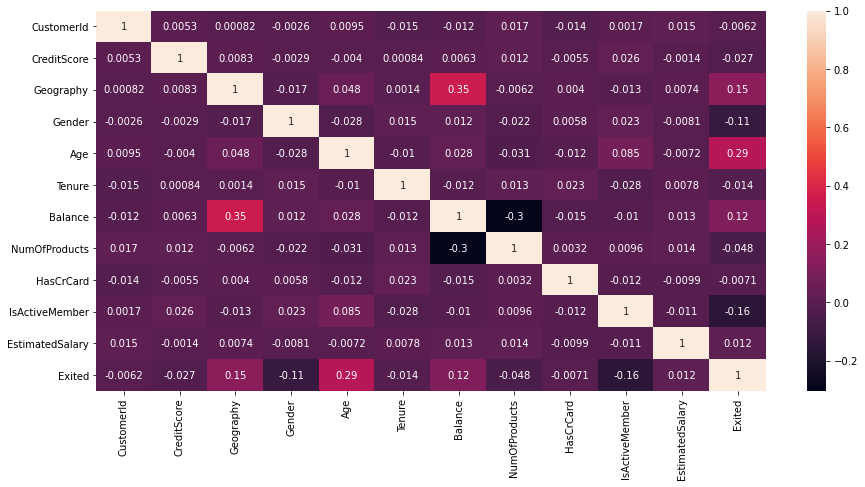

In [17]:
## Checking for correlation among features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [44]:
##Correlation within Target
df.corr()['Exited'].sort_values(ascending=False)[1:]

Age                0.285323
Geography          0.153771
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [45]:
## Type of features after encoding
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [46]:
## Feature Selection
df.drop(columns=['CustomerId','Surname', 'HasCrCard'], inplace=True)

#Dropping 'CustomerId' because its just show Unique ID for the customer
#Dropping 'Surname' because its just show last name of the customer
#Dropping 'HasCrCard' because it has small correlation within target. Also from the EDA, it showed that whether customers has Credit card or No not to affect of exiting account

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,101348.88,1
2,608,1,0,41,1,83807.86,1,1,112542.58,0
3,502,0,0,42,8,159660.80,3,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,93826.63,0
5,850,1,0,43,2,125510.82,1,1,79084.10,0


In [59]:
## Feature Engineering

#1. Since CreditScore has outliers, so I did binning in this feature
bin_creditscore=[300, 629, 689, 719, 850] #range kelompok (349-629, 630-689, 690-719, 720-850)
label = ['Bad', 'Fair', 'Good', 'Excellent']
df['CreditScore_bin'] = pd.cut(df['CreditScore'], bins=bin_creditscore, labels=label)

#2. Since Age has outliers, also so I did binning in this feature
bin_age=[17, 25, 35, 45, 55, 65, 92] #range kelompok (18-25, 26-35, 36-45, 46-55, 56-65, 66-92)
label = ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula']
df['age_bin'] = pd.cut(df['Age'], bins=bin_age, labels=label)

In [60]:
df['CreditScore_bin'].unique()

[Bad, Good, Excellent, Fair]
Categories (4, object): [Bad < Fair < Good < Excellent]

In [61]:
df['age_bin'].unique()

[Dewasa Akhir, Lansia Awal, Dewasa Awal, Remaja, Lansia Akhir, Manula]
Categories (6, object): [Remaja < Dewasa Awal < Dewasa Akhir < Lansia Awal < Lansia Akhir < Manula]

In [62]:
## Encoding for new feature
df['CreditScore_bin'] = df['CreditScore_bin'].map({'Bad':0, 'Fair':1,'Good':2,'Excellent':3})
df['age_bin'] = df['age_bin'].map({'Remaja':0, 'Dewasa Awal':1, 'Dewasa Akhir':2, 'Lansia Awal':3, 'Lansia Akhir':4, 'Manula':5})

In [63]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,CreditScore_bin,age_bin
RowNumber,,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,101348.88,1,0,2
2,608,1,0,41,1,83807.86,1,1,112542.58,0,0,2
3,502,0,0,42,8,159660.80,3,0,113931.57,1,0,2
4,699,0,0,39,1,0.00,2,0,93826.63,0,2,2
5,850,1,0,43,2,125510.82,1,1,79084.10,0,3,2


In [64]:
## dropping columns
df.drop(columns=['CreditScore', 'Age'], inplace=True)

### Machine Learning  Building

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(print_changed_only=False)
## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [93]:
x = df.drop(columns='Exited')
y = df['Exited']

In [94]:
## Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

In [95]:
x_train.isna().sum()

Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
CreditScore_bin    0
age_bin            0
dtype: int64

In [96]:
df.isna().sum()

Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
CreditScore_bin    0
age_bin            0
dtype: int64

In [106]:
x_train

,Geography,Gender,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,CreditScore_bin,age_bin
RowNumber,,,,,,,,,
2152,0,1,7,0.00,1,0,159475.08,3,4
8393,2,1,3,102128.27,1,0,63981.37,3,1
5007,2,0,0,113865.23,2,1,117396.25,3,2
4118,0,1,5,0.00,2,0,83093.25,0,2
7183,2,1,6,110540.43,2,1,107472.99,2,3
...,...,...,...,...,...,...,...,...,...
4556,1,0,6,0.00,1,0,25488.43,1,1
4645,1,1,5,0.00,2,0,151425.82,2,5
8943,0,0,9,71786.90,2,1,67734.79,1,2


### Handling Imbalance data

In [107]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,CreditScore_bin,age_bin,Exited
RowNumber,,,,,,,,,,
2152,0,1,7,0.00,1,0,159475.08,3,4,1
8393,2,1,3,102128.27,1,0,63981.37,3,1,1
5007,2,0,0,113865.23,2,1,117396.25,3,2,0
4118,0,1,5,0.00,2,0,83093.25,0,2,0
7183,2,1,6,110540.43,2,1,107472.99,2,3,0


In [108]:
df_train.isna().sum()

Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
CreditScore_bin    0
age_bin            0
Exited             0
dtype: int64

In [110]:
not_exit = df_train[df_train['Exited'] == 0] ##Kelas Majority
exit = df_train[df_train['Exited'] == 1] ##Kelas Minority

In [111]:
from sklearn.utils import resample

In [112]:
exit_oversample = resample(exit, ## Kelas Minority
                           replace=True,
                           n_samples = len(not_exit), ## Jumlah dari kelas Majority
                           random_state = 42)

In [113]:
df_OverSample = pd.concat([not_exit, exit_oversample])

In [114]:
x_train_OverSample = df_OverSample.drop(columns='Exited')
y_train_OverSample = df_OverSample['Exited']

In [115]:
x_train_OverSample.isna().sum()

Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
CreditScore_bin    0
age_bin            0
dtype: int64

**Note**:

**While building Machine Learning, I would focused on recall positif (Machine predict Not Exit account but in Actual Customers Exit account**

### 1. Base Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()

In [124]:
#fit model
modelDT.fit(x_train_OverSample, y_train_OverSample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [125]:
y_predDT_test = modelDT.predict(x_test)
y_predDT_train= modelDT.predict(x_train_OverSample)

print('Accuracy train: {}'.format(accuracy_score(y_predDT_train, y_train_OverSample)))
print('Accuracy test: {}'.format(accuracy_score(y_predDT_test, y_test)))

Accuracy train: 1.0
Accuracy test: 0.8015


In [126]:
acc_DT = accuracy_score(y_test, y_predDT_test)
prec_DT = precision_score(y_test, y_predDT_test)
rec_DT = recall_score(y_test, y_predDT_test)
f1_DT = f1_score(y_test, y_predDT_test)

print(classification_report(y_test, y_predDT_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1593
           1       0.51      0.49      0.50       407

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



- Base Decision tree after handling imbalance has recall 0.49


In [127]:
cm_DT = confusion_matrix(y_test, y_predDT_test, labels=[1,0])
df_DT = pd.DataFrame(data=cm_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_DT

,Pred 1,Pred 0
Akt 1,200,207
Akt 0,190,1403


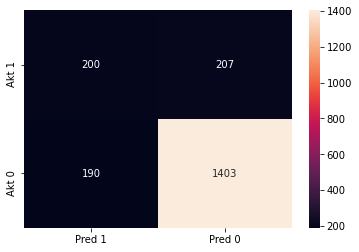

In [128]:
sns.heatmap(df_DT, annot=True, fmt='g')

### 2. Base Random forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
modelRF = RandomForestClassifier()

In [123]:
modelRF.fit(x_train_OverSample, y_train_OverSample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
y_predRF_test = modelRF.predict(x_test)
y_predRF_train = modelRF.predict(x_train_OverSample)

print('Accuracy train: {}'.format(accuracy_score(y_predRF_train, y_train_OverSample)))
print('Accuracy test: {}'.format(accuracy_score(y_predRF_test, y_test)))

Accuracy train: 1.0
Accuracy test: 0.8365


In [130]:
acc_RF = accuracy_score(y_test, y_predRF_test)
prec_RF = precision_score(y_test, y_predRF_test)
rec_RF= recall_score(y_test, y_predRF_test)
f1_RF=f1_score(y_test, y_predRF_test)

print(classification_report(y_test, y_predRF_test, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.92      0.90      1593
     class 1       0.62      0.52      0.57       407

    accuracy                           0.84      2000
   macro avg       0.75      0.72      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [131]:
cm_RF = confusion_matrix(y_test, y_predRF_test, labels=[1,0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_RF

,Pred 1,Pred 0
Akt 1,213,194
Akt 0,133,1460


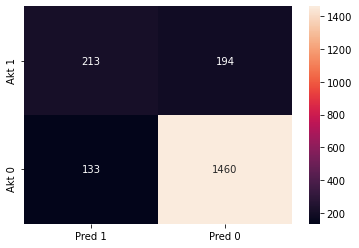

In [132]:
sns.heatmap(df_RF, annot=True, fmt='g')

### 3. Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
modelLog = LogisticRegression()

In [136]:
modelLog.fit(x_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_predLog_test = modelLog.predict(x_test)
y_predLog_train = modelLog.predict(x_train_OverSample)

print('Accuracy train: {}'.format(accuracy_score(y_predLog_train, y_train_OverSample)))
print('Accuracy test: {}'.format(accuracy_score(y_predLog_test, y_test)))

Accuracy train: 0.5687598116169544
Accuracy test: 0.4875


In [138]:
acc_Log = accuracy_score(y_test, y_predLog_test)
prec_Log = precision_score(y_test, y_predLog_test)
rec_Log= recall_score(y_test, y_predLog_test)
f1_Log=f1_score(y_test, y_predLog_test)

print(classification_report(y_test, y_predLog_test, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.85      0.43      0.57      1593
     class 1       0.24      0.70      0.36       407

    accuracy                           0.49      2000
   macro avg       0.54      0.56      0.47      2000
weighted avg       0.72      0.49      0.53      2000



In [139]:
cm_Log = confusion_matrix(y_test, y_predLog_test, labels=[1,0])
df_Log = pd.DataFrame(data=cm_Log, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_Log

,Pred 1,Pred 0
Akt 1,283,124
Akt 0,901,692


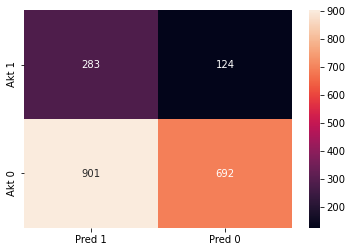

In [140]:
sns.heatmap(df_Log, annot=True, fmt='g')

### Optimize Mode - Hyper Parameter Tuning

### 1. Tuning Decision Tree

In [141]:
DT_tuned = DecisionTreeClassifier()

In [159]:
param_DT = {'max_depth':[None, 30, 32],
           'min_samples_split':[2,40,32],
           'min_samples_leaf':[1,15,21],
           'max_features':[None, .3, .7]}

In [160]:
model_DT = GridSearchCV(estimator=DT_tuned, param_grid=param_DT,
                       cv=3,
                       n_jobs=-1,
                        verbose=1,
                        scoring='recall'
                       )

In [161]:
model_DT.fit(x_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 228 out of 243 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    2.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 30, 32],
                         'max

In [162]:
DT_tuned = model_DT.best_estimator_
DT_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=32, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
y_tunedDT_test = DT_tuned.predict(x_test)
y_tunedDT_train = DT_tuned.predict(x_train_OverSample)

print('Accuracy train: {}'.format(accuracy_score(y_tunedDT_train, y_train_OverSample)))
print('Accuracy test: {}'.format(accuracy_score(y_tunedDT_test, y_test)))

Accuracy train: 1.0
Accuracy test: 0.793


In [164]:
acc_DT_tuned = accuracy_score(y_test, y_tunedDT_test)
prec_DT_tuned = precision_score(y_test, y_tunedDT_test)
rec_DT_tuned = recall_score(y_test, y_tunedDT_test)
f1_DT_tuned = f1_score(y_test, y_tunedDT_test)

print(classification_report(y_test, y_tunedDT_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.49      0.50      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



In [165]:
cm_DT_tuned = confusion_matrix(y_test, y_tunedDT_test, labels=[1,0])
df_DT_tuned = pd.DataFrame(data=cm_DT_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_DT_tuned

,Pred 1,Pred 0
Akt 1,203,204
Akt 0,210,1383


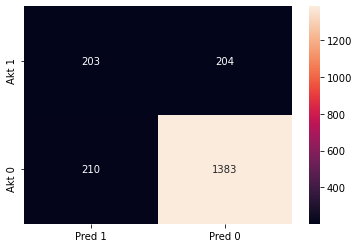

In [166]:
sns.heatmap(df_DT_tuned, annot=True, fmt='g')

### 2. Tuning random Forest

In [167]:
RF = RandomForestClassifier()

In [169]:
param_RF = {'n_estimators': [100, 700],
           'max_depth':[None, 23],
           'min_samples_split':[2,15],
           'min_samples_leaf':[1,5],
           'max_features':[None, .4,]}

In [170]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv=3, n_jobs=-1, verbose=1, scoring='recall')

In [171]:
model_RF.fit(x_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [172]:
model_RF.best_params_

{'max_depth': 23,
 'max_features': 0.4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [173]:
RF_tuned = model_RF.best_estimator_
RF_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
y_tunedRF_test = RF_tuned.predict(x_test)
y_tunedRF_train = RF_tuned.predict(x_train_OverSample)

print('Accuracy train: {}'.format(accuracy_score(y_tunedRF_train, y_train_OverSample)))
print('Accuracy test: {}'.format(accuracy_score(y_tunedRF_test, y_test)))

Accuracy train: 1.0
Accuracy test: 0.8395


In [175]:
acc_RF_tuned = accuracy_score(y_test, y_tunedRF_test)
prec_RF_tuned = precision_score(y_test, y_tunedRF_test)
rec_RF_tuned = recall_score(y_test, y_tunedRF_test)
f1_RF_tuned = f1_score(y_test, y_tunedRF_test)

print(classification_report(y_test, y_tunedRF_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.62      0.54      0.58       407

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.84      2000



In [176]:
cm_RF_tuned = confusion_matrix(y_test, y_tunedRF_test, labels=[1,0])
df_RF_tuned = pd.DataFrame(data=cm_RF_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_RF_tuned

,Pred 1,Pred 0
Akt 1,220,187
Akt 0,134,1459


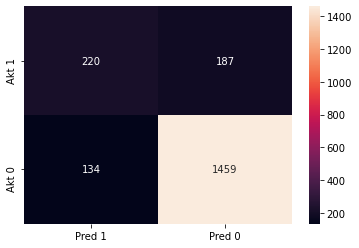

In [177]:
sns.heatmap(df_RF_tuned, annot=True, fmt='g')

### Evaluation Matrix

In [178]:
eva_mat = {
    'Decision Tree':[acc_DT, prec_DT, rec_DT, f1_DT],
    'Tuning Decision Tree':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF, prec_RF, rec_RF, f1_RF],
    'Tuning Random Forest':[acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned],
    'Logistic Regression':[acc_Log, prec_Log, rec_Log, f1_Log]
}
pd.DataFrame(data=eva_mat, index=['Accuracy', 'Precision','Recall', 'F1 Score'])

,Decision Tree,Tuning Decision Tree,Random Forest,Tuning Random Forest,Logistic Regression
Accuracy,0.801500,0.793000,0.836500,0.839500,0.487500
Precision,0.512821,0.491525,0.615607,0.621469,0.239020
Recall,0.491400,0.498771,0.523342,0.540541,0.695332
F1 Score,0.501882,0.495122,0.565737,0.578187,0.355751


#### Conclusion:
- Best Base Model after handling imbalance data using Random Over Sampling is Logistic regression with Recall 0.70
- While after did a Tuning on Decision tree and Random Forest, Tuning random forest has higher recall rather than Decision Tree

#### Suggestion :
Since I didn't do scaling for Balance and EstimatedSalary features because I used algorithms that base on tree, its would be better to try another algorithms that use distance base likes KNN, SVC etc and did scaling in both of that features.

### Export Model

In [179]:
import joblib

In [182]:
joblib.dump(modelLog, 'Modelbank')

['Modelbank']